In [10]:
# %matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [11]:
# load text tole_stat.csv; this file contains different user types and total counts
import csv
with open('cohort_access_log.csv', 'r') as f:
    A_temp = csv.reader(f)
    temp = list(A_temp)

print(temp[0]) # The column names

AL = np.array(temp[1:])
print(AL.shape)

['accessTimeDiff', 'jc_uid', 'pat_enc_csn_id_coded', 'event_type', 'pat_class', 'emergencyAdmitTime', 'ctHeadOrderTime', 'tpaDescription', 'tpaOrderTime', 'tpaAdminTime', 'inptClass', 'inpatientAdmitTime', 'rit_uid', 'process_id', 'metric_id', 'metric_name', 'user_deid', 'workstation_id', 'csn', 'access_action_c', 'access_action_name', 'deployment_id', 'audit_session_id', 'access_time_jittered_utc', 'access_time_jittered', 'user_role']
(381051, 26)


In [12]:
# Find the number of unique users for each patient
# we have a dictionary of patients (jc_uid). Each patient has dictionary of different statistics: 
#          time2tpa, number of unique users, etc

Unique_ids, Indx = np.unique(AL[:,1], return_index = True) # unique patiant ids

#print(Unique_ids.shape)
#print(Indx.shape)
#print(Unique_ids == AL[Indx,1])

import datetime

# Create the patient dictionary and extract TPA times for each patient and put it in a dictionary

Time2tpa = np.zeros(Indx.shape)
Pat_dic = {}

for id in Indx:
    t1 = AL[id,5]
    t2 = AL[id,9]
    #print(t1,t2)
    date_time_t1 = datetime.datetime.strptime(t1, '%Y-%m-%d %H:%M:%S')
    date_time_t2 = datetime.datetime.strptime(t2, '%Y-%m-%d %H:%M:%S')
    delta_t = date_time_t2 - date_time_t1
    time_int = int(delta_t.total_seconds() / 60)
    
    if time_int < 60*10:
        Pat_dic[AL[id,1]] = {} #each patient has a dictionary
        Pat_dic[AL[id,1]]['t2tpa'] = time_int

        


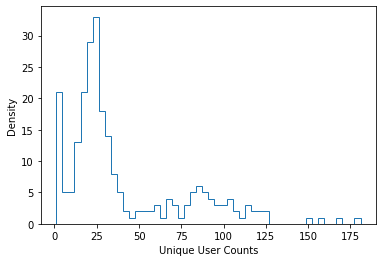

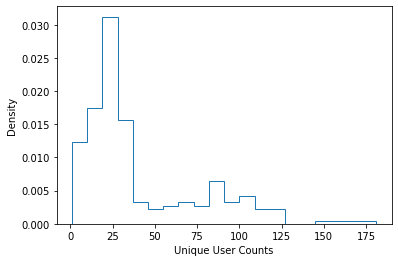

In [15]:

# extract number of unique users for each patient

for id in Pat_dic.keys():
    #print(Pat_dic[id])
    Pat_dic[id]['unique_users'] = np.unique(AL[np.where(AL[:,1]==id)[0],16]).shape[0]

Unique_user_counts = np.array([Pat_dic[id]['unique_users'] for id in Pat_dic.keys()])

# plot counts
plt.hist(Unique_user_counts,  bins=50, facecolor='blue', histtype = 'step')
plt.xlabel('Unique User Counts')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()


# plot
plt.hist(Unique_user_counts, density = True,  bins=20, facecolor='blue', histtype = 'step')
plt.xlabel('Unique User Counts')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()

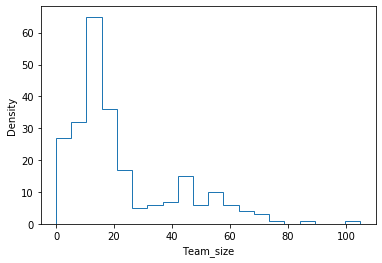

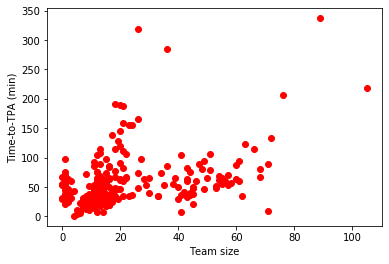

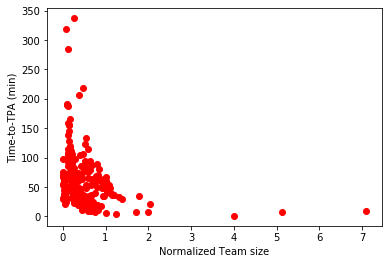

In [14]:
## extract team size  (unique users > 5) for each patient
AL_limit=10

for id in Pat_dic.keys():
    #print(Pat_dic[id])
    _ , user_counts = np.unique(AL[np.where(AL[:,1]==id)[0],16], return_counts = True)
    
    Pat_dic[id]['team_size'] = np.sum(user_counts>=AL_limit)

Team_size = np.array([Pat_dic[id]['team_size'] for id in Pat_dic.keys()])

# plot
plt.hist(Team_size,  bins=20, facecolor='blue', histtype = 'step')
plt.xlabel('Team_size')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()

## plot team size vs TPA
Team_size = np.array([Pat_dic[id]['team_size'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])


plt.scatter(Team_size,Time2tpa,color='r')

plt.xlabel('Team size')
plt.ylabel('Time-to-TPA (min)')

plt.show()


## plot "normalized" team size vs TPA

N_Team_size = Team_size/Time2tpa

#Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])


plt.scatter(N_Team_size,Time2tpa,color='r')

plt.xlabel('Normalized Team size')
plt.ylabel('Time-to-TPA (min)')

plt.show()

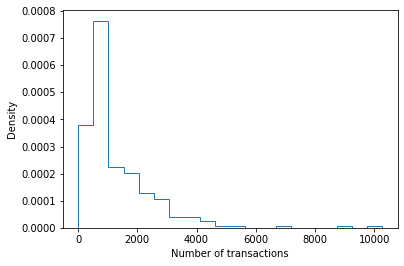

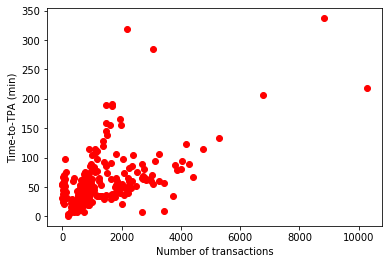

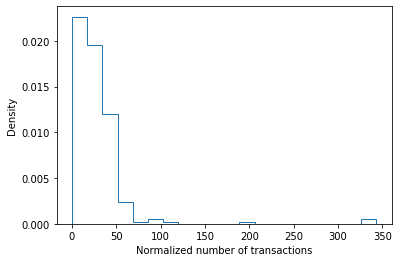

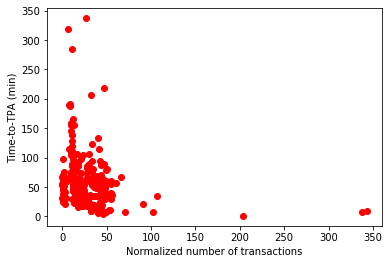

In [6]:
# Extract the of the number of transactions and Plot distribution

for id in Pat_dic.keys():
    #print(Pat_dic[id])
    Pat_dic[id]['num_trans'] = np.where(AL[:,1]==id)[0].shape[0]

Num_trans = np.array([Pat_dic[id]['num_trans'] for id in Pat_dic.keys()])

# Density plot
plt.hist(Num_trans, density = True,  bins=20, facecolor='blue', histtype = 'step')
plt.xlabel('Number of transactions')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()

# Scatter plot
plt.scatter(Num_trans,Time2tpa,color='r')

plt.xlabel('Number of transactions')
plt.ylabel('Time-to-TPA (min)')
plt.show()



# Normalized transactions
Num_N_trans = Num_trans/Time2tpa

# Distribution plot
plt.hist(Num_N_trans, density = True,  bins=20, facecolor='blue', histtype = 'step')
plt.xlabel('Normalized number of transactions')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()


# Scatter plot
plt.scatter(Num_N_trans,Time2tpa,color='r')

plt.xlabel('Normalized number of transactions')
plt.ylabel('Time-to-TPA (min)')
plt.show()

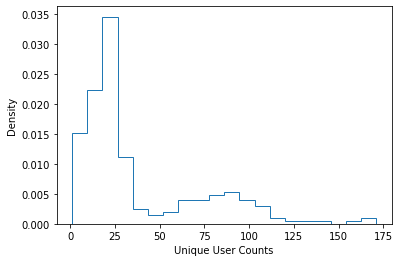

[ 16  14  31  35  46   1  16  21   1  23  27  11  20  79  22 105  49   4
 170  27]
[ 17  10  23  21  40   1  16  20   2  23  27  11  18  72  21  98  50   3
 171  22]
It looks like each computer has a unique workstation id, and almost always each user has used a separate computer


In [7]:
# Extract number of unique stations_ids per patients

for id in Pat_dic.keys():
    #print(Pat_dic[id])
    #print(np.unique(AL[np.where(AL[:,1]==id)[0],17]).shape[0])
    
    Pat_dic[id]['unique_workstation'] = np.unique(AL[np.where(AL[:,1]==id)[0],17]).shape[0]

Unique_workstation = np.array([Pat_dic[id]['unique_workstation'] for id in Pat_dic.keys()])

# plot
plt.hist(Unique_workstation, density = True,  bins=20, facecolor='blue', histtype = 'step')
plt.xlabel('Unique User Counts')
plt.ylabel('Density')
#plt.legend(loc='upper left')
plt.show()


print(Unique_user_counts[:20])
print(Unique_workstation[:20])
print('It looks like each computer has a unique workstation id, and almost always each user has used a separate computer')

In [8]:
# get the counts of top workstations (based on the first three letters)
AL = np.array(temp[1:])

# add workstation letters as a separate column to the table

Wks_vec = np.array([AL[r,17][:3] for r in range(AL.shape[0])])
#print(AL.shape)
#print(Wks_vec.shape)
AL_aug = np.append(AL, np.reshape(Wks_vec,(-1,1)), axis=1)
#print(AL_aug.shape)

#R = 
names_unsorted, counts_unsorted =np.unique(AL_aug[:,-1],return_counts=True)

print(names_unsorted.shape[0])

I_sort = np.argsort(- counts_unsorted) # argsort in desc order
WKS_name_counts_sorted = counts_unsorted[I_sort][:10]
WKS_name_sorted = names_unsorted[I_sort][:10]

print(WKS_name_counts_sorted)
#print(np.sum(Trans_name_counts_sorted ))
print(WKS_name_sorted)

35
[236633  45754  27671  27539  14848  14348   8400   3575    855    455]
['WKS' 'GEN' 'COW' 'WOW' 'BCA' '' 'LAP' 'TAN' 'TCL' 'TC0']


In [9]:
# get the counts of each transaction


AL = np.array(temp[1:])
print(AL.shape)

#print(AL[10,-1].type)

#print(AL[:10,-1])

#R = 
names_unsorted, counts_unsorted =np.unique(AL[:,15],return_counts=True)

print(names_unsorted.shape[0])

I_sort = np.argsort(- counts_unsorted) # argsort in desc order
Trans_name_counts_sorted = counts_unsorted[I_sort][:10]
Trans_name_sorted = names_unsorted[I_sort][:10]

print(Trans_name_counts_sorted)
#print(np.sum(Trans_name_counts_sorted ))
print(Trans_name_sorted)

(381051, 26)
455
[136684  78504  15497  14444  11009   9663   8423   7868   6084   5244]
['Inpatient Patient Lists activity accessed'
 'Report with patient data viewed' 'SmartLink used'
 'Patient Station accessed' 'Related encounters requested'
 'Notes activity and navigators accessed'
 'Visit Navigator Flowsheet section is accessed' 'Order transmitted'
 'Order list changed' 'Flowsheet activity accessed']


In [ ]:
####.  test codes #####
#print(AL[np.where(AL[:,1]==AL[10,1])[0],16].shape)
#print(np.unique(AL[np.where(AL[:,1]==AL[10600,1])[0],17]))
print(AL[100,:])